In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler

/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# reading in the normalized dataset 
data = pd.read_csv('final_data.csv', encoding = 'ISO-8859-1')
data.head()

,Unnamed: 0,year,status,pay_method_ACH,pay_method_credit card,pay_method_paper check,state_0,state_1,state_2,state_3,...,months,state,status_0,status_1,status_2,status_3,status_4,lp_amount,income,Y
0,0,2014.0,Returned < 90 days,0,1,0,0,0,0,0,...,0.87,MA,0,0,0,0,1,0.500,0.462722,0
1,1,2015.0,Returned < 90 days,0,1,0,0,0,0,0,...,0.00,MA,0,0,0,0,1,0.375,0.462722,0
2,2,2016.0,Returned < 90 days,0,1,0,0,0,0,0,...,0.67,MA,0,0,0,0,1,0.625,0.462722,0
3,3,2014.0,Decline,0,1,0,0,0,0,0,...,0.57,MA,0,0,0,1,0,0.500,0.621078,0
4,4,2017.0,Returned,0,1,0,0,0,0,0,...,3.73,MA,0,0,0,1,1,0.625,0.621078,0


In [3]:
# Creating a separate dataframe for the dropped columns that can't be used in a logistic regression
data_dropped = data[['state', 'months', 'status']]

# Dropping rows that will not be used in the logistic regression
data = data.drop(['Unnamed: 0', 'state', 'months', 'status'], axis = 1)

In [4]:
# Splitting the dataset into the features and target variables
X = data.iloc[:,:-1]
y = data['Y']

# Splitting the data using the train_test_split sklearn package
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2019)

In [5]:
random = RandomOverSampler(random_state=2019)
X_train_ros, y_train_ros = random.fit_resample(X_train, y_train)

In [7]:
# Starting to build the parameters of the model
logreg = LogisticRegression(solver='liblinear')

# Fitting the model using the training data
logreg = logreg.fit(X_train_ros, y_train_ros)

# Creating the y2_pred variable
y_pred = logreg.predict(X_test)

# Creating the confusion matrix for the regression
cnf_mat2 = metrics.confusion_matrix(y_test, y_pred)
cnf_mat2

array([[16216,  6436],
       [   89,  2753]])

Text(0.5, 257.44, 'Predicted')

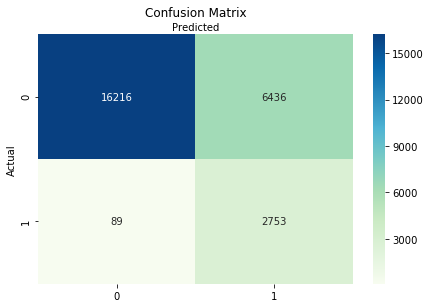

In [8]:
# Visualizing the confusion matrix of the balanced dataset to make it easier to view
names = [0,1]
fig, ax = plt.subplots()
ticks = np.arange(len(names))
plt.xticks(ticks, names)
plt.yticks(ticks, names)

sns.heatmap(pd.DataFrame(cnf_mat2), annot=True, cmap="GnBu", fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [9]:
# Printing the accuracy, precision, and recall for the balanced dataset
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7440574252765356
Precision: 0.2995973446512134
Recall: 0.9686840253342717


In [9]:
# Getting the f1 score for the balanced dataset
f1_score(y_test, y_pred, average='weighted')

0.736238917043436

In [10]:
# Concatenating the data back together with the columns I dropped earlier in the notebook
data = pd.concat([data, data_dropped] ,axis = 1)

#Changing the dataframe order so the Y variable is last
data = data[['year', 'pay_method_ACH', 'pay_method_credit card',
       'pay_method_paper check', 'state_0', 'state_1', 'state_2', 'state_3',
       'state_4', 'state_5', 'state_6', 'status_0', 'status_1', 'status_2',
       'status_3', 'status_4', 'lp_amount', 'income', 'state',
       'months', 'status', 'Y']]

data.columns

Index(['year', 'pay_method_ACH', 'pay_method_credit card',
       'pay_method_paper check', 'state_0', 'state_1', 'state_2', 'state_3',
       'state_4', 'state_5', 'state_6', 'status_0', 'status_1', 'status_2',
       'status_3', 'status_4', 'lp_amount', 'income', 'state', 'months',
       'status', 'Y'],
      dtype='object')

In [10]:
# Running the trained model on the training and test data to make sure the model is not overfitting

# Running accuracy on both sets
print("Train Accuracy:",metrics.accuracy_score(y_train, logreg.predict(X_train)))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Running precision on both sets
print("Train Precision:",metrics.precision_score(y_train, logreg.predict(X_train)))
print("Test Precision:",metrics.precision_score(y_test, y_pred))

# Running recall on both sets
print("Train Recall:",metrics.recall_score(y_train, logreg.predict(X_train)))
print("Test Recall:",metrics.recall_score(y_test, y_pred))

Train Accuracy: 0.7439722803347281
Test Accuracy: 0.7440574252765356
Train Precision: 0.30066823189452774
Test Precision: 0.2995973446512134
Train Recall: 0.974250936329588
Test Recall: 0.9686840253342717
